In [1]:
#VISUALIZACION DE INTERPRETACION
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from groundedPL.logic_tester import LogicTester
from itertools import product, combinations
import random
lt = LogicTester()

NUM_FILAS = 5
NUM_COLUMNAS = 5

def visualizar(I):
        # Inicializo el plano que contiene la figura
        fig, axes = plt.subplots()
        axes.get_xaxis().set_visible(False)
        axes.get_yaxis().set_visible(False)
        ax = plt.gca()
        ax.set_facecolor('lightslategrey')

        step = 1/NUM_FILAS
        tangulos = []
        font_size = step * 100
        colors = dict()
        colors[0] = (1,0,1)
        colors[1] = (0,0,1)
        colors[2] = (0,0.5,0)
        colors[3] = (1,0,0)
        colors[4] = (0,0,0.5)
        colors[5] = (0.5,0,0)
        colors[6] = (0,0.5,0.5)
        colors[7] = (0,0,0)
        colors[8] = (0.5,0.5,0.5)

        # Creo los cuadrados claros en el tablero
        for atomo in I:
            if I[atomo]:
                # DECODIFICAMOS EL ÁTOMO PARA VISUALIZACIÓN
                predicado = lt.to_lp.obtener_predicado(atomo)
                if(len(lt.to_lp.obtener_argumentos(atomo)) > 2):
                    x, y, n = lt.to_lp.obtener_argumentos(atomo)
                    n = int(n)
                else:
                    x, y = lt.to_lp.obtener_argumentos(atomo)
                x = int(x)
                old_y = y
                y = NUM_COLUMNAS - int(y) - 1


                if predicado == 'ELECCION':
                    # tangulos.append(patches.Rectangle((step * x, step * y), step, step, facecolor='lightslategrey'))
                    plt.text(x * step + step * 3 / 4,
                             y * step + step * 3 / 4,
                             f'E',
                             fontsize=font_size/2,
                             color='lawngreen')
                elif predicado == 'MINA':
                    # tangulos.append(patches.Rectangle((step * x, step * y), step, step, facecolor='lightslategrey'))
                    plt.text(x * step + step / 4,
                             y * step + step / 4,
                             f'M',
                             fontsize=font_size/2,
                             color='red')
                elif predicado == 'NUM':
                    tangulos.append(patches.Rectangle((step * x, step * y), step, step, facecolor='white'))
                    plt.text(x * step + step / 2,
                             y * step + step / 2,
                             f'{n}',
                             fontsize=font_size,
                             color=colors[n])

        # Creo las líneas del tablero
        for j in range(8):
            locacion = j * step
            # Crea linea horizontal en el rectangulo
            tangulos.append(patches.Rectangle(*[(0, step + locacion), 1, 0.005],\
                    facecolor='black'))
            # Crea linea vertical en el rectangulo
            tangulos.append(patches.Rectangle(*[(step + locacion, 0), 0.005, 1],\
                    facecolor='black'))
        # Dibujo el tablero
        for t in tangulos:
            axes.add_patch(t)
        plt.show()

In [2]:
#CONVERTIR MODELO EN DICCIONARIO
def to_dict(literales: list[str]):
    I = dict()
    for literal in literales:
        if literal[0] == '-':
            I[literal[1:]] = False
        else:
            I[literal] = True
    return I

In [19]:
#GENERACION DE TABLERO Y REGLAS
casillas = [(x,y) for x in range(NUM_FILAS) for y in range(NUM_COLUMNAS)]
nums = range(9)

for x, y in product(range(NUM_FILAS), range(NUM_COLUMNAS)):
    formula = f'MINA({x},{y})'
    lt.to_lp.parse(formula)
    # formula = f'TAPADA({x},{y})'
    # lt.to_lp.parse(formula)
    # formula = f'ELECCION({x},{y})'
    # lt.to_lp.parse(formula)
    for n in nums:
        formula = f'NUM({x},{y},{n})'
        lt.to_lp.parse(formula)


def vecinos(pos: tuple[int,int]):
    vecinos = [(x,y) for x in range(pos[0] - 1, pos[0] + 2) for y in range(pos[1] - 1, pos[1] + 2)]
    vecinos = [casilla for casilla in vecinos if casilla != pos and 0 <= casilla[0] < NUM_FILAS and 0 <= casilla[1] < NUM_COLUMNAS]
    return vecinos

# def Ytoria(forms: list[str]) -> str:
#     if len(forms) == 0:
#         return None
#     if len(forms) == 1:
#         return forms[0]
#     if type(forms) == str:
#         return forms
#     ytoria = '('
#     if len(forms) > 0:
#         for i in range(len(forms)):
#             if(0 < i < len(forms)):
#                 ytoria += '&'
#             if(
#                 '&' in forms or
#                 '|' in forms or
#                 '->' in forms 
#             ):
#                 ytoria += '(' + forms[i] + ')'
#             else:
#                 ytoria +=  forms[i] 
#         ytoria += ')'
#     return ytoria

# def YtoriaForms(forms: list[str]) -> str:
#     if len(forms) == 0:
#         return None
#     if len(forms) == 1:
#         return forms[0]
#     if type(forms) == str:
#         return forms
#     ytoria = '('
#     # ytoria = ''
#     if len(forms) > 0:
#         for i in range(len(forms)):
#             if(0 < i < len(forms)):
#                 ytoria += '∧'
#             if(
#                 '&' in forms or
#                 '|' in forms or
#                 '->' in forms 
#             ):
#                 ytoria += '(' + forms[i] + ')'
#             else:
#                 ytoria +=  forms[i] 
#         ytoria += ')'
#     return ytoria

def YtoriaForms(lista_forms):
    form = ''
    inicial = True
    if len(lista_forms) == 0:
        return None
    for f in lista_forms:
        if inicial:
            form = f
            inicial = False
        else:
            form = '(' + form + '∧' + f + ')'
    return form

def Ytoria(lista_forms):
    form = ''
    inicial = True
    if len(lista_forms) == 0:
        return None
    for f in lista_forms:
        if inicial:
            form = f
            inicial = False
        else:
            form = '(' + form + '&' + f + ')'
    return form

def Otoria(lista_forms):
    form = ''
    inicial = True
    for f in lista_forms:
        if inicial:
            form = f
            inicial = False
        else:
            form = '(' + form + '|' + f + ')'
    return form
# def Otoria(forms: list[str]) -> str:
#     if len(forms) == 0:
#         return None
#     if len(forms) == 1:
#         return forms[0]
#     if type(forms) == str:
#         return forms
#     otoria = '('
#     if len(forms) > 0:
#         for i in range(len(forms)):
#             if(0 < i < len(forms)):
#                 otoria += '|'
#             if(
#                 '&' in forms or
#                 '|' in forms or
#                 '->' in forms 
#             ):
#                 otoria += '(' + forms[i] + ')'
#             else:
#                 otoria +=  forms[i] 
#         otoria += ')'
#     return otoria

#regla 0: si hay un numero, no hay una mina
def regla_0():
    forms = []
    for (x,y) in casillas:
        otoria_forms = []
        for n in nums:
            formula = f'NUM({x},{y},{n}) -> -MINA({x},{y})'
            otoria_forms.append(formula)
        otoria = Otoria(otoria_forms)
        # print(otoria)
        forms.append(otoria)
    return Otoria(forms)

#NUM(x,y,n) -> PARA TODO M IN NUMS != N, -NUM(x,y,m)
def regla_1():
    formulas = []
    for (x,y) in casillas:
        otoria_forms = []
        for n in nums:
            if n > len(vecinos((x,y))):
                continue
            literales = []
            for m in nums:
                if m > len(vecinos((x,y))):
                    continue
                literal = ''
                if m != n:
                    literal = f'-NUM({x},{y},{m})'
                else:
                    literal = f'NUM({x},{y},{m})'
                literales.append(literal)
            ytoria = Ytoria(literales)
            otoria_forms.append(ytoria)
        otoria = Otoria(otoria_forms)
        formulas.append(otoria)
        print(otoria)
    return Ytoria(formulas)


#Regla 1: Si una casilla tiene un numero, entonces no hay una mina
# def regla_1():
#     formulas = []
#     for casilla in casillas:
#         formulas_otoria = []
#         vec = vecinos(casilla)
#         formula = f'NUM({casilla[0]},{casilla[1]},1) ->'
#         for vecino in vec:
#             form_1 = f'(MINA({vecino[0]},{vecino[1]}) &'
#             formulas_ytoria = []
#             for vec2 in vec:
#                 if vec2 != vecino:
#                     formulas_ytoria.append(f'-MINA({vec2[0]},{vec2[1]})')
#             ytoria = Ytoria(formulas_ytoria)
#             form_1 += ytoria + ')'
#             formulas_otoria.append(form_1)
#         otoria = Otoria(formulas_otoria)
#         formula += otoria
#         formulas.append(formula)
#         print(formula)
#     return Ytoria(formulas)
        
#Regla 2: Una casilla debe contener un solo numero
def regla_2():
    formulas_ytoria = []
    formulas = []
    for casilla in casillas:
        x = casilla[0]
        y = casilla[1]
        for n in nums:
            formulas_ytoria = []
            for m in nums:
                if n != m:
                    formula = f'(-NUM({x},{y},{m}))'
                    formulas_ytoria.append(formula)
            ytoria = Ytoria(formulas_ytoria)
            formula = f'(NUM({x},{y},{n})) -> ({ytoria})'
            formulas.append(formula)
            # print(formula)
    return Ytoria(formulas)

            
#Regla 3: El numero de una casilla coincide con la cantidad de sus vecinos que contengan una mina.
def regla_3():
    formulas_ytoria = []
    for casilla in casillas:
        vec = vecinos(casilla)
        for num in nums:
            if(num > len(vec)):
                continue
            combinaciones = list(combinations(vec, num))
            formulas_otoria = []
            for S in combinaciones:
                ytoria_minas = []
                ytoria_vacia = []
                for mina in S:
                    formula = f'MINA({mina[0]},{mina[1]})'
                    ytoria_minas.append(formula)
                for vacia in vec:
                    if vacia not in S:
                        formula = f'-MINA({vacia[0]},{vacia[1]})'
                        ytoria_vacia.append(formula)
                minas = Ytoria(ytoria_minas)
                vacias = Ytoria(ytoria_vacia)
                if(vacias == None):
                    formula = minas
                elif(minas == None):
                    formula = vacias
                else:
                    formula = f'{minas} & {vacias}'
                formulas_otoria.append(formula)
            otoria = Otoria(formulas_otoria)
            a = f'( NUM({casilla[0]},{casilla[1]},{num}) -> ({otoria}) )'
            b = f'( ({otoria}) -> NUM({casilla[0]},{casilla[1]},{num}) )'
            formula = f'{a} & {b}'
            formulas_ytoria.append(formula)
            # print(formula)
    return Ytoria(formulas_ytoria)

#Regla 4: Si una casilla es una mina, debe estar tapada. (De modo que no acabe el juego)
def regla_4():
    formulas = []
    for casilla in casillas:
        formula = f'(TAPADA({casilla[0]},{casilla[1]}) -> MINA({casilla[0]}, {casilla[1]}))'
        formulas.append(formula)
    return Ytoria(formulas)

#------------Reglas de elección de casilla----------

#Regla 5: Una casilla (x,y) es seleccionable si y solo si no contiene una mina
def regla_5():
    formulas = []
    for casilla in casillas:
        a = f'-ELECCION({casilla[0]},{casilla[1]})'
        b = f'MINA({casilla[0]},{casilla[1]})'
        # formula = f'(({a}->{b})&({b}->{a}))'
        formula = f'({b}->{a})'
        formulas.append(formula)
    return Ytoria(formulas)


#Regla 6:  Si una casilla destapada (x,y) contiene al numero n, y se tienen n vecinos marcados inseleccionables 
#(es decir, se dedujo que tienen una mina), el resto de vecinos tapados no son minas.
def regla_6():
    formulas_ytoria = []
    for casilla in casillas:
        vec = vecinos(casilla)
        for num in nums:
            # if num > len(vec):
                # continue
            if num != 0:
                continue
            combinaciones = list(combinations(vec, num))
            forms_otoria = []
            for S in combinaciones:
                if num == len(vec):
                    continue
                #izquierda
                formula = f'( NUM({casilla[0]},{casilla[1]},{num}) & -TAPADA({casilla[0]},{casilla[1]})'
                minas = []
                for mina in S:
                    minas.append(f'MINA({mina[0]},{mina[1]})')
                if len(minas) > 0:
                    formula += '&' + Ytoria(minas) 
                formula += ') -> '
                #derecha
                vacias = []
                for vecino in vec:
                    if vecino not in S:
                        vacias.append(f'-MINA({vecino[0]},{vecino[1]})')
                formula +=  Ytoria(vacias)
                # print(num, formula)
                # formulas_ytoria.append(formula)
                forms_otoria.append(formula)
            otoria = Otoria(forms_otoria)
            # print(forms_otoria)
            if otoria != None:
                formulas_ytoria.append(otoria)
            # print("cambio de numero")
    return Ytoria(formulas_ytoria)


#Regla 7: Si una casilla destapada (x,y) contiene al numero n, y se tienen n vecinos tapados, entonces los vecinos tapados son minas.
def regla_7():
    formulas_ytoria = []
    for casilla in casillas:
        vec = vecinos(casilla)
        for num in nums:
            if num > len(vec) or num == 0:
                continue
            combinaciones = list(combinations(vec, num))
            otoria_forms = []
            for S in combinaciones:
                formula = f'( NUM({casilla[0]},{casilla[1]},{num}) & -TAPADA({casilla[0]},{casilla[1]})'
                tapados = []
                minas = []
                for vecino in vec:
                    if vecino in S:
                        tapados.append(f'TAPADA({vecino[0]},{vecino[1]})')
                        minas.append(f'-ELECCION({vecino[0]},{vecino[1]})')
                    else:
                        tapados.append(f'-TAPADA({vecino[0]},{vecino[1]})')
                if len(tapados) > 0:
                    formula += f' & {Ytoria(tapados)}'
                formula += f') -> ({Ytoria(minas)})'
                # print(formula)
                otoria_forms.append(formula)
            otoria = Otoria(otoria_forms)
            # print(otoria_forms)
            formulas_ytoria.append(otoria)
            # print('cambio de numero')
    return Ytoria(formulas_ytoria)

minas = [(3,3)]

def regla_tablero():
    literales = []
    tablero = []
    for _ in range(NUM_FILAS):
        fila = []
        for _ in range(NUM_COLUMNAS):
            fila.append(0)
        tablero.append(fila)

    for mina in minas:
        for vecino in vecinos(mina):
            if vecino not in minas:
                tablero[vecino[1]][vecino[0]] += 1

    for x in range(NUM_FILAS):
        for y in range(NUM_COLUMNAS):
            if (x,y) in minas:
                # literales.append(f'TAPADA({x},{y})')
                # literales.append(f'MINA({x},{y})')
                tablero[y][x] = '*'
            else:
                chance = random.randint(0,9)
                num = tablero[y][x]
                if chance < 8:
                    literales.append(f'NUM({x},{y},{num})')
                    # literales.append(f'-TAPADA({x},{y},{num})')
                else:
                    # literales.append(f'TAPADA({x},{y})')
                    # literales.append(f'NUM({x},{y},{num})')
                    tablero[y][x] = '-'
    
    for fila in tablero:
        for casilla in fila:
            print(f'{str(casilla)}', end=', ')
        print('\n')
    return Ytoria(literales)

def reglas_individual():
    r = []
    print('reglaTablero')
    r.append(lt.translation_to_prover(regla_tablero()))
    print('regla0')
    r.append(lt.translation_to_prover(regla_0()))
    # print('regla1')
    # r.append(lt.translation_to_prover(regla_1()))
    # print('regla2')
    # r.append(lt.translation_to_prover(regla_2()))
    # print('regla3')
    # r.append(lt.translation_to_prover(regla_3()))
    # print('regla4')
    # r.append(lt.translation_to_prover(regla_4()))
    # print('regla5')
    # r.append(lt.translation_to_prover(regla_5()))
    # print('regla6')
    # r.append(lt.translation_to_prover(regla_6()))
    # print('regla7')
    # r.append(lt.translation_to_prover(regla_7()))
    print('reglas listas.')
    return YtoriaForms(r)


reglaTablero
0, 0, 0, -, 0, 

0, 0, -, 0, 0, 

0, 0, 1, 1, -, 

0, 0, 1, *, -, 

0, 0, 1, 1, -, 

regla0
reglas listas.
transformando a tseitin...
transformacion completa!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
RESOLVIENDO 
La fórmula es satisfacible


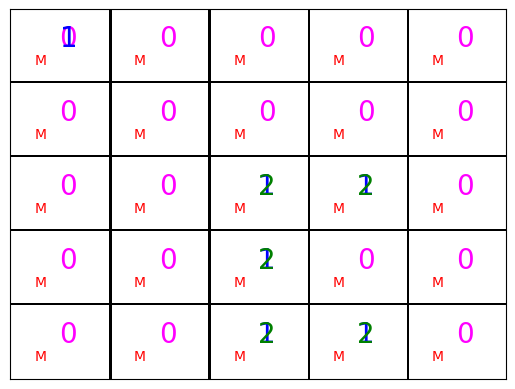

In [20]:
#SOLUCION DEL PROBLEMA
# formula_lp = lt.translation_to_prover(reglas())
formula_lp = reglas_individual()
res = lt.SATsolve(formula_lp)
modelo = []
if res == 'UNSAT':
    # print('La fórmula es insatisfacible')
    print('nah bro you alone in this one cuh 💀💀💀💀💀💀💀💀💀💀')
else:
    print('La fórmula es satisfacible')
    modelo = [lt.to_numeric.literal(x) for x in res]
    modelo = [x for x in modelo if lt.to_numeric.solo_atomo(x) in lt.tseitin.atomos] 
    # print(f'\nUn modelo es:\n\n\t{modelo}')
    # decodificado = [lt.to_lp.modelo_lp.decodificar(x) for x in modelo]
    # print(f'\nEl modelo decodificado es:\n\n\t{decodificado}')
    I = to_dict(modelo)
    visualizar(I)

In [16]:
regla_0()

((((((((NUM(0,0,0) & -MINA(0,0)|NUM(0,0,1) & -MINA(0,0))|NUM(0,0,2) & -MINA(0,0))|NUM(0,0,3) & -MINA(0,0))|NUM(0,0,4) & -MINA(0,0))|NUM(0,0,5) & -MINA(0,0))|NUM(0,0,6) & -MINA(0,0))|NUM(0,0,7) & -MINA(0,0))|NUM(0,0,8) & -MINA(0,0))
((((((((NUM(0,1,0) & -MINA(0,1)|NUM(0,1,1) & -MINA(0,1))|NUM(0,1,2) & -MINA(0,1))|NUM(0,1,3) & -MINA(0,1))|NUM(0,1,4) & -MINA(0,1))|NUM(0,1,5) & -MINA(0,1))|NUM(0,1,6) & -MINA(0,1))|NUM(0,1,7) & -MINA(0,1))|NUM(0,1,8) & -MINA(0,1))
((((((((NUM(0,2,0) & -MINA(0,2)|NUM(0,2,1) & -MINA(0,2))|NUM(0,2,2) & -MINA(0,2))|NUM(0,2,3) & -MINA(0,2))|NUM(0,2,4) & -MINA(0,2))|NUM(0,2,5) & -MINA(0,2))|NUM(0,2,6) & -MINA(0,2))|NUM(0,2,7) & -MINA(0,2))|NUM(0,2,8) & -MINA(0,2))
((((((((NUM(0,3,0) & -MINA(0,3)|NUM(0,3,1) & -MINA(0,3))|NUM(0,3,2) & -MINA(0,3))|NUM(0,3,3) & -MINA(0,3))|NUM(0,3,4) & -MINA(0,3))|NUM(0,3,5) & -MINA(0,3))|NUM(0,3,6) & -MINA(0,3))|NUM(0,3,7) & -MINA(0,3))|NUM(0,3,8) & -MINA(0,3))
((((((((NUM(0,4,0) & -MINA(0,4)|NUM(0,4,1) & -MINA(0,4))|NUM(0,4,2) & -M

''